In [27]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [28]:
# df1 = pd.read_csv('data/1-2019.csv')
# df2 = pd.read_csv('data/2-2019.csv')
# df3 = pd.read_csv('data/3-2019.csv')
# df4 = pd.read_csv('data/4-2019.csv')
# df5 = pd.read_csv('data/5-2019.csv')
# df6 = pd.read_csv('data/6-2019.csv')
# df7 = pd.read_csv('data/7-2019.csv')
# df8 = pd.read_csv('data/8-2019.csv')
# df9 = pd.read_csv('data/9-2019.csv')
# df10 = pd.read_csv('data/10-2019.csv')
# df11 = pd.read_csv('data/11-2019.csv')
# df12 = pd.read_csv('data/12-2019.csv')

In [53]:
df1 = pd.read_csv('data/1-2019.zip')

In [44]:
for col in df1.columns:
    print(col)

YEAR
QUARTER
MONTH
DAY_OF_MONTH
DAY_OF_WEEK
FL_DATE
OP_UNIQUE_CARRIER
OP_CARRIER_FL_NUM
ORIGIN_AIRPORT_ID
ORIGIN
DEST_AIRPORT_ID
DEST
DEP_DELAY
DEP_DELAY_NEW
DEP_DEL15
TAXI_OUT
ARR_DELAY
ARR_DELAY_NEW
ARR_DEL15
CANCELLED
DIVERTED
CRS_ELAPSED_TIME
DISTANCE
Unnamed: 23


In [47]:
df1[['OP_UNIQUE_CARRIER']]

,OP_UNIQUE_CARRIER
0,9E
1,9E
2,9E
3,9E
4,9E
...,...
583980,UA
583981,UA
583982,UA
583983,UA


In [31]:
df_consolidated = df1[['DAY_OF_WEEK','ORIGIN','DEST','DEP_DELAY','ARR_DELAY','ARR_DEL15','CANCELLED','DIVERTED','CRS_ELAPSED_TIME','DISTANCE']]

,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
0,6,MSP,CVG,-10.0,-25.0,0.0,0.0,0.0,121.0,596.0
1,7,MSP,CVG,-4.0,-37.0,0.0,0.0,0.0,126.0,596.0
2,1,MSP,CVG,-9.0,-17.0,0.0,0.0,0.0,126.0,596.0
3,2,MSP,CVG,-4.0,-23.0,0.0,0.0,0.0,126.0,596.0
4,3,MSP,CVG,-6.0,-12.0,0.0,0.0,0.0,126.0,596.0
...,...,...,...,...,...,...,...,...,...,...
583980,3,PDX,ORD,-9.0,-27.0,0.0,0.0,0.0,232.0,1739.0
583981,3,ORD,SNA,35.0,17.0,1.0,0.0,0.0,268.0,1726.0
583982,3,RSW,ORD,132.0,113.0,1.0,0.0,0.0,192.0,1120.0
583983,3,EWR,ORD,32.0,37.0,1.0,0.0,0.0,155.0,719.0


In [29]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

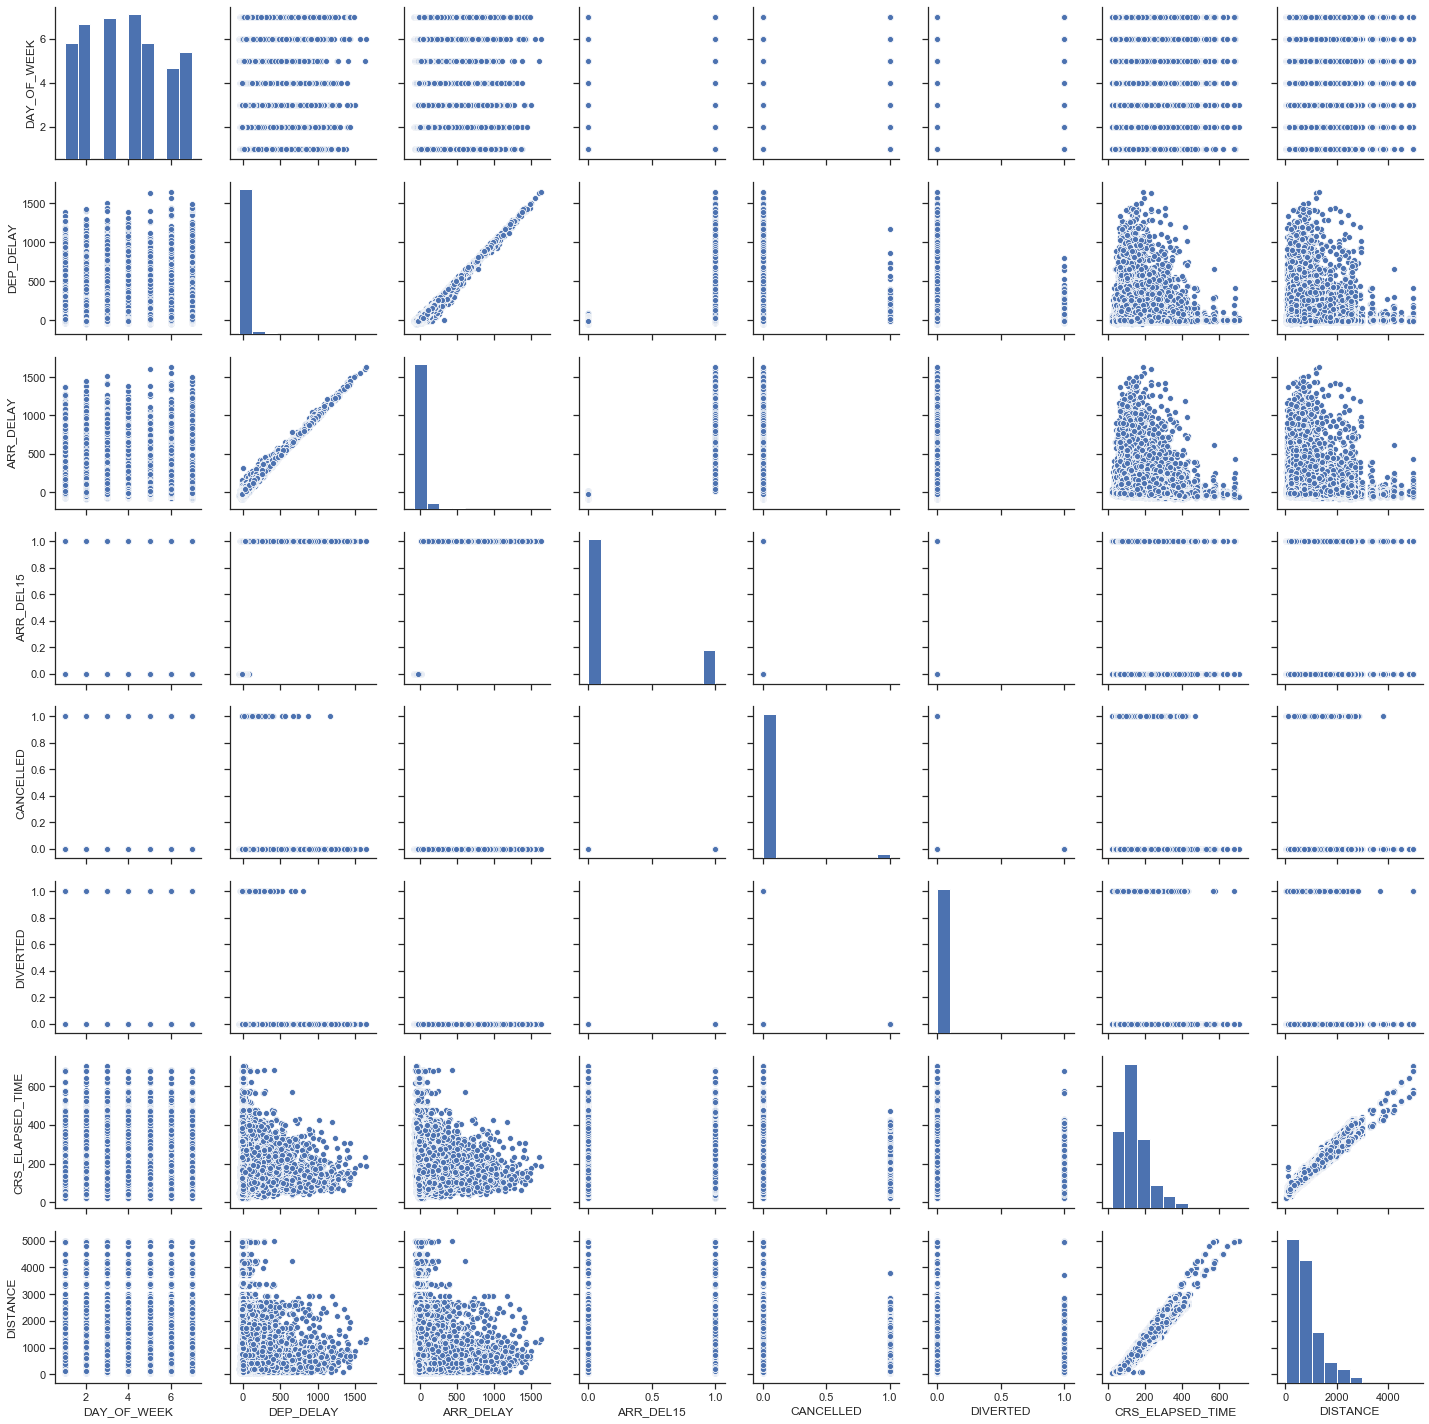

In [36]:
sns.pairplot(df_consolidated)

In [51]:
df_few = df1[['OP_UNIQUE_CARRIER','ORIGIN','DEST','DEP_DELAY','ARR_DELAY','CANCELLED','DIVERTED','CRS_ELAPSED_TIME','DISTANCE']]


#

/Users/Justin_Turner/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Justin_Turner/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


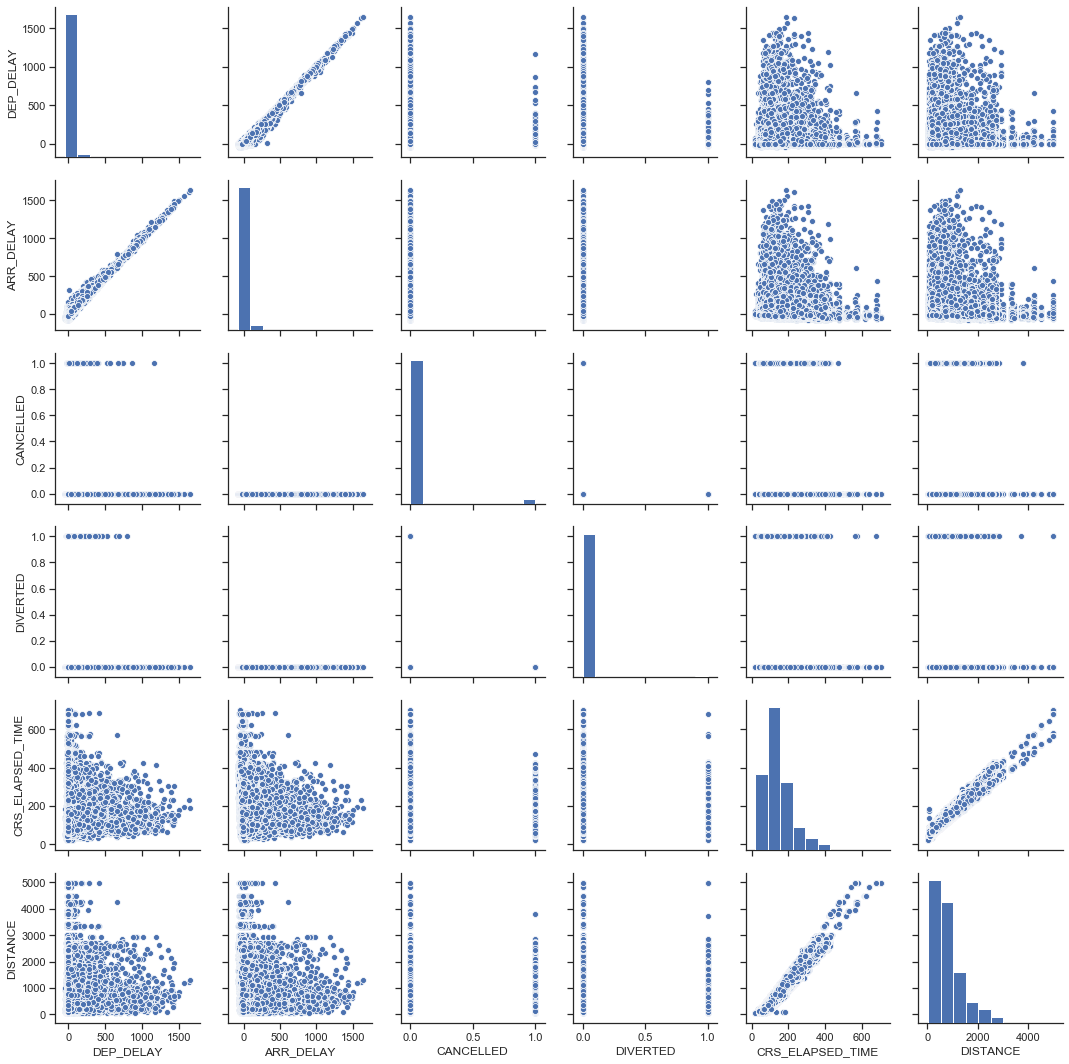

In [38]:
sns.pairplot(df_few)

In [40]:
dffew = df_few

In [52]:
df_few

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
0,9E,MSP,CVG,-10.0,-25.0,0.0,0.0,121.0,596.0
1,9E,MSP,CVG,-4.0,-37.0,0.0,0.0,126.0,596.0
2,9E,MSP,CVG,-9.0,-17.0,0.0,0.0,126.0,596.0
3,9E,MSP,CVG,-4.0,-23.0,0.0,0.0,126.0,596.0
4,9E,MSP,CVG,-6.0,-12.0,0.0,0.0,126.0,596.0
...,...,...,...,...,...,...,...,...,...
583980,UA,PDX,ORD,-9.0,-27.0,0.0,0.0,232.0,1739.0
583981,UA,ORD,SNA,35.0,17.0,0.0,0.0,268.0,1726.0
583982,UA,RSW,ORD,132.0,113.0,0.0,0.0,192.0,1120.0
583983,UA,EWR,ORD,32.0,37.0,0.0,0.0,155.0,719.0


In [124]:
airline_names_df = pd.read_csv('data/L_UNIQUE_CARRIERS.csv')

In [132]:
airport_names_df = pd.read_csv('data/Airport Name Codes.csv')

In [133]:
airline_names_df

,OP_UNIQUE_CARRIER,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1666,ZW,Air Wisconsin Airlines Corp
1667,ZX,Air Georgian
1668,ZX (1),Airbc Ltd.
1669,ZY,Atlantic Gulf Airlines


In [134]:
merged_df = pd.merge(df_few,airline_names_df, on='OP_UNIQUE_CARRIER')

In [135]:
merged_df = pd.merge(merged_df,airport_names_df, on='ORIGIN')

In [138]:
merged_df

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,Description_x,Description_y
0,9E,MSP,CVG,-10.0,-25.0,0.0,0.0,121.0,596.0,Endeavor Air Inc.,"Minneapolis, MN: Minneapolis-St Paul Internati..."
1,9E,MSP,CVG,-4.0,-37.0,0.0,0.0,126.0,596.0,Endeavor Air Inc.,"Minneapolis, MN: Minneapolis-St Paul Internati..."
2,9E,MSP,CVG,-9.0,-17.0,0.0,0.0,126.0,596.0,Endeavor Air Inc.,"Minneapolis, MN: Minneapolis-St Paul Internati..."
3,9E,MSP,CVG,-4.0,-23.0,0.0,0.0,126.0,596.0,Endeavor Air Inc.,"Minneapolis, MN: Minneapolis-St Paul Internati..."
4,9E,MSP,CVG,-6.0,-12.0,0.0,0.0,126.0,596.0,Endeavor Air Inc.,"Minneapolis, MN: Minneapolis-St Paul Internati..."
...,...,...,...,...,...,...,...,...,...,...,...
583980,HA,PPG,HNL,0.0,-5.0,0.0,0.0,330.0,2599.0,Hawaiian Airlines Inc.,"Pago Pago, TT: Pago Pago International"
583981,HA,PPG,HNL,-1.0,5.0,0.0,0.0,330.0,2599.0,Hawaiian Airlines Inc.,"Pago Pago, TT: Pago Pago International"
583982,HA,PPG,HNL,-5.0,-6.0,0.0,0.0,330.0,2599.0,Hawaiian Airlines Inc.,"Pago Pago, TT: Pago Pago International"
583983,HA,PPG,HNL,13.0,12.0,0.0,0.0,330.0,2599.0,Hawaiian Airlines Inc.,"Pago Pago, TT: Pago Pago International"


In [144]:
grouped_df = merged_df.groupby('Description_y').mean()
grouped_df

,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
Description_y,,,,,,
"Aberdeen, SD: Aberdeen Regional",9.983333,4.916667,0.032258,0.000000,81.387097,257.000000
"Abilene, TX: Abilene Regional",5.428571,8.273810,0.011765,0.000000,59.505882,158.000000
"Adak Island, AK: Adak",-1.333333,-11.111111,0.000000,0.000000,168.444444,1192.000000
"Aguadilla, PR: Rafael Hernandez",12.117949,6.564103,0.005102,0.000000,192.632653,1237.443878
"Akron, OH: Akron-Canton Regional",11.861217,8.237094,0.036765,0.001838,115.040441,481.507353
...,...,...,...,...,...,...
"Wilmington, NC: Wilmington International",6.342593,-0.038961,0.016423,0.000000,95.089416,339.757299
"Worcester, MA: Worcester Regional",19.477273,13.352273,0.053763,0.000000,153.333333,817.333333
"Wrangell, AK: Wrangell Airport",11.913793,13.625000,0.064516,0.032258,27.596774,56.500000


In [147]:
#grouped_and_sorted_by_airline_df = merged_df.groupby('Description').mean().sort_values(by=['ARR_DELAY'])
#grouped_and_sorted_by_airline_df
grouped_and_sorted_by_airport_df = merged_df.groupby('Description_y').mean().sort_values(by=['DEP_DELAY'])
grouped_and_sorted_by_airport_df

,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
Description_y,,,,,,
"Deadhorse, AK: Deadhorse Airport",-11.682927,-13.625000,0.035294,0.023529,63.600000,318.188235
"Barrow, AK: Wiley Post/Will Rogers Memorial",-10.266667,-14.266667,0.032258,0.000000,97.790323,614.000000
"Nome, AK: Nome Airport",-8.491803,-11.000000,0.016129,0.000000,87.258065,510.290323
"Scottsbluff, NE: Western Neb. Regional/William B. Heilig Field",-7.588235,-11.098039,0.037736,0.000000,62.000000,150.000000
"Kotzebue, AK: Ralph Wien Memorial",-7.306452,-7.344262,0.000000,0.016129,70.951613,394.935484
...,...,...,...,...,...,...
"Ogdensburg, NY: Ogdensburg International",49.900000,52.900000,0.090909,0.000000,190.272727,1186.727273
"Devils Lake, ND: Devils Lake Regional",55.187500,38.191489,0.094340,0.018868,91.226415,313.377358
"Meridian, MS: Key Field",58.931034,55.241379,0.064516,0.000000,102.129032,407.000000


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

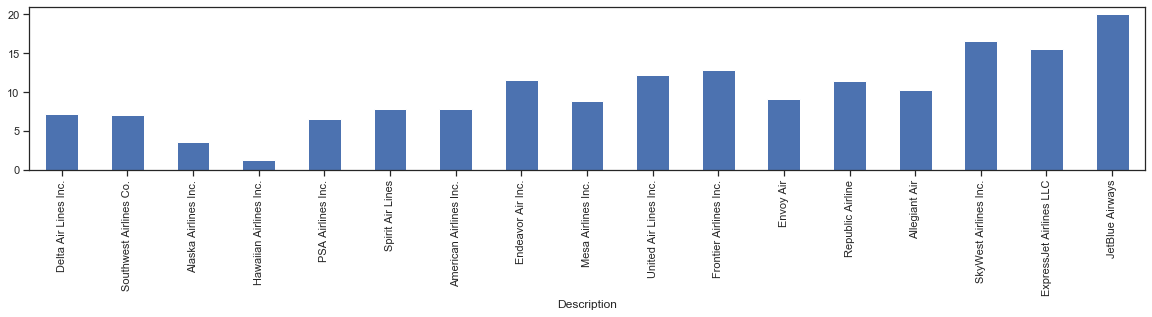

In [119]:
plt.figure(figsize=(20, 3))
plt.xticks(rotation=15)
grouped_and_sorted_by_airline_df['DEP_DELAY'].plot.bar(x='Description', y='ARR_DELAY', rot='vertical')



<BarContainer object of 17 artists>

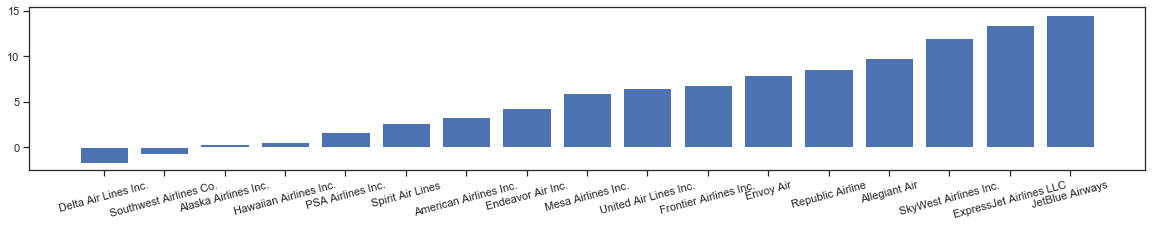

In [120]:
plt.figure(figsize=(20, 3))
plt.xticks(rotation=15)
plt.bar(grouped_and_sorted_by_airline_df['ARR_DELAY'].index, grouped_and_sorted_by_airline_df['ARR_DELAY'].values)

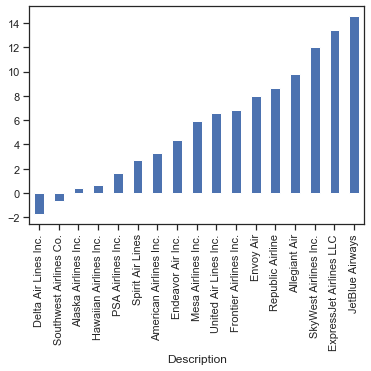

In [122]:
grouped_and_sorted_by_airline_df['ARR_DELAY'].plot.bar()

In [123]:
grouped_and_sorted_by_airport_df = merged_df.groupby('ORIGIN').mean().sort_values(by=['ARR_DELAY'])
grouped_and_sorted_by_airport_df

,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
ORIGIN,,,,,,
CPR,-3.514286,-17.720588,0.000000,0.028571,87.042857,308.514286
LYH,-4.521739,-16.630435,0.041667,0.000000,79.645833,175.000000
LWS,-5.687500,-15.265625,0.000000,0.000000,96.031250,461.000000
BRW,-10.266667,-14.266667,0.032258,0.000000,97.790323,614.000000
GTR,-1.243902,-14.012195,0.012048,0.000000,86.048193,241.000000
...,...,...,...,...,...,...
RFD,43.187500,43.833333,0.000000,0.000000,178.145833,1203.875000
IMT,59.666667,46.982456,0.017241,0.000000,90.448276,297.500000
OGS,49.900000,52.900000,0.090909,0.000000,190.272727,1186.727273


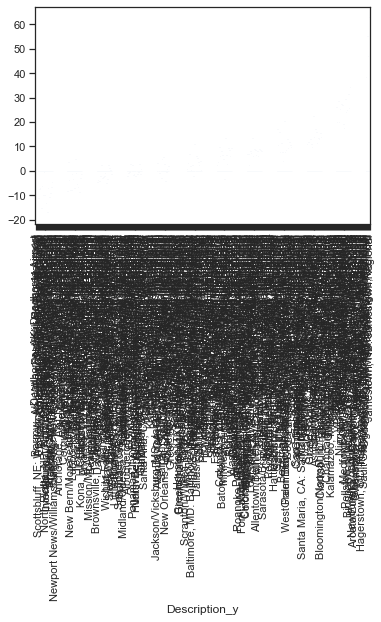

In [148]:
grouped_and_sorted_by_airport_df['ARR_DELAY'].plot.bar()